In [1]:
import time

In [2]:
import numpy as np

In [3]:
np.random.seed(0)

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
from sklearn.learning_curve import learning_curve

In [8]:
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,train_sizes=np.linspace(.1,1.0,5)):
    plt.figure()
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=5,n_jobs=1,train_sizes=train_sizes)
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label='Training score')
    plt.plot(train_sizes,test_scores_mean,'o-',color='g',label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid('on')
    if ylim:
        plt.ylim(ylim)
    plt.title(title)

In [9]:
from sklearn.datasets import make_classification

In [10]:
X,y=make_classification(1000,n_features=20,n_informative=2,n_redundant=2,n_classes=2,random_state=0)

In [11]:
from pandas import DataFrame

In [12]:
df=DataFrame(np.hstack((X,y[:,None])),columns=range(20)+['class'])

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,class
0,-1.063780,0.676409,1.069356,-0.217580,0.460215,-0.399167,-0.079188,1.209385,-0.785315,-0.172186,...,-0.993119,0.306935,0.064058,-1.054233,-0.527496,-0.074183,-0.355628,1.057214,-0.902592,0.0
1,0.070848,-1.695281,2.449449,-0.530494,-0.932962,2.865204,2.435729,-1.618500,1.300717,0.348402,...,0.225324,0.605563,-0.192101,-0.068027,0.971681,-1.792048,0.017083,-0.375669,-0.623236,1.0
2,0.940284,-0.492146,0.677956,-0.227754,1.401753,1.231653,-0.777464,0.015616,1.331713,1.084773,...,-0.050120,0.948386,-0.173428,-0.477672,0.760896,1.001158,-0.069464,1.359046,-1.189590,1.0
3,-0.299517,0.759890,0.182803,-1.550233,0.338218,0.363241,-2.100525,-0.438068,-0.166393,-0.340835,...,1.178724,2.831480,0.142414,-0.202819,2.405715,0.313305,0.404356,-0.287546,-2.847803,1.0
4,-2.630627,0.231034,0.042463,0.478851,1.546742,1.637956,-1.532072,-0.734445,0.465855,0.473836,...,-1.061194,-0.888880,1.238409,-0.572829,-1.275339,1.003007,-0.477128,0.098536,0.527804,0.0


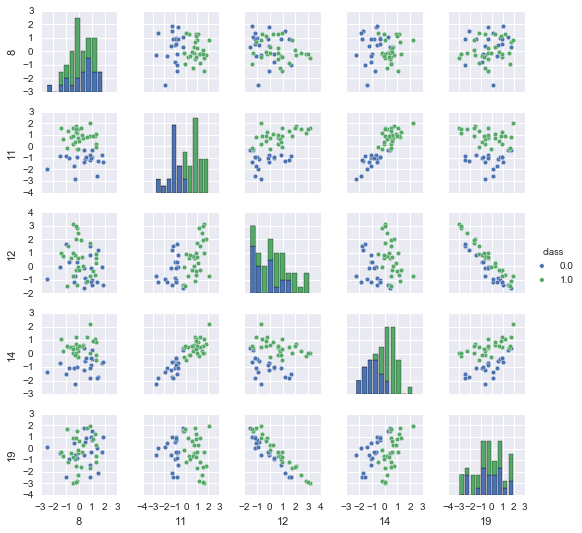

In [14]:
sns.pairplot(df[:50],vars=[8,11,12,14,19],hue='class',size=1.5)

//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


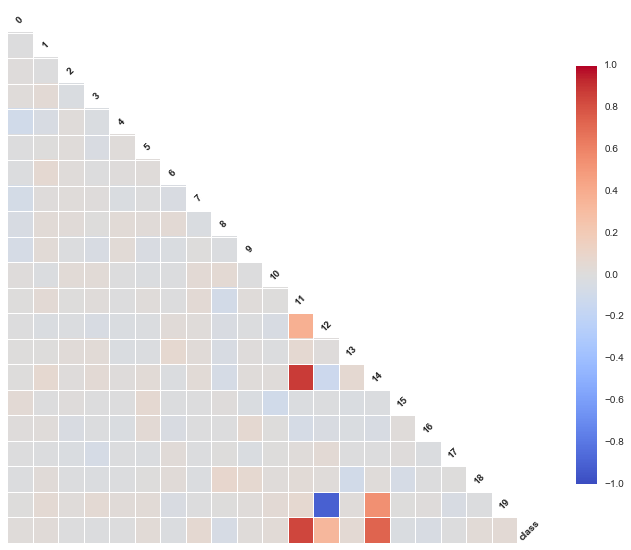

In [15]:
plt.figure(figsize=(12,10))
sns.corrplot(df,annot=False)

In [18]:
from sklearn.svm import LinearSVC

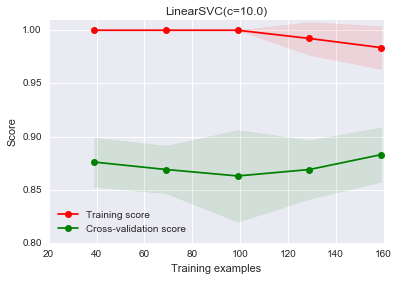

In [19]:
plot_learning_curve(LinearSVC(C=10.0),"LinearSVC(c=10.0)",X,y,ylim=(0.8,1.01),train_sizes=np.linspace(.05,0.2,5))

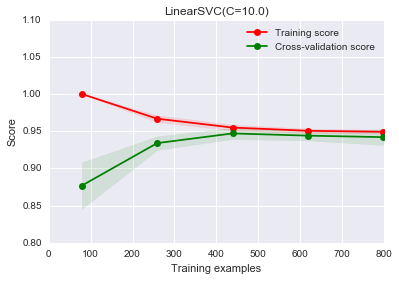

In [20]:
plot_learning_curve(LinearSVC(C=10.0),"LinearSVC(C=10.0)",X,y,ylim=(0.8,1.1),train_sizes=np.linspace(.1,1.0,5))

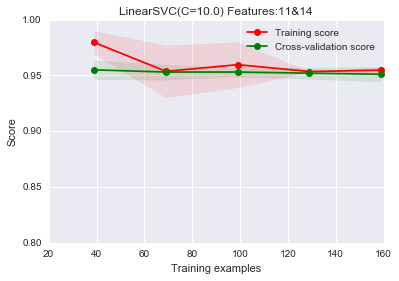

In [22]:
plot_learning_curve(LinearSVC(C=10.0),"LinearSVC(C=10.0) Features:11&14",X[:,[11,14]],y,ylim=(0.8,1.0),train_sizes=np.linspace(.05,0.2,5))

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
from sklearn.feature_selection import SelectKBest,f_classif

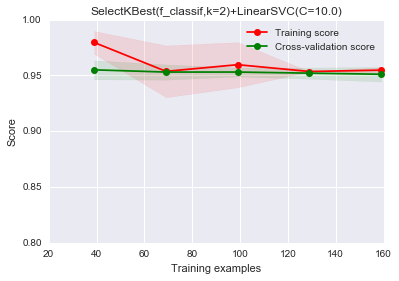

In [27]:
plot_learning_curve(Pipeline([('fs',SelectKBest(f_classif,k=2)),('svc',LinearSVC(C=10.0))])
                    ,"SelectKBest(f_classif,k=2)+LinearSVC(C=10.0)",X,y,ylim=(0.8,1.0),train_sizes=np.linspace(.05,0.2,5))

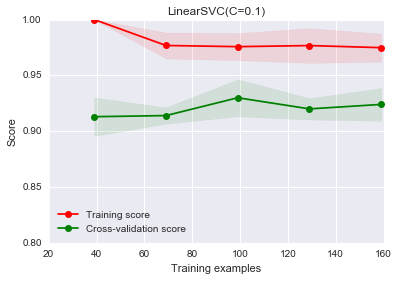

In [28]:
plot_learning_curve(LinearSVC(C=0.1),"LinearSVC(C=0.1)",X,y,ylim=(0.8,1.0),train_sizes=np.linspace(.05,0.2,5))

In [29]:
from sklearn.grid_search import GridSearchCV

In [30]:
est=GridSearchCV(LinearSVC(),param_grid={'C':[0.001,0.01,0.1,1.0,10.0]})

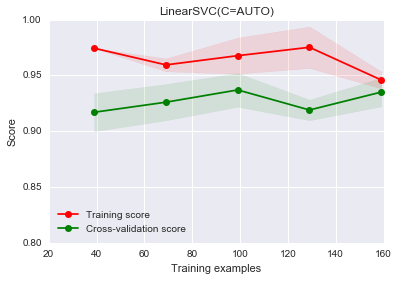

In [31]:
plot_learning_curve(est,"LinearSVC(C=AUTO)",X,y,ylim=(0.8,1.0),train_sizes=np.linspace(.05,0.2,5))

In [33]:
"Chosen parameter on 100 datapoints:%s"%est.fit(X[:100],y[:100]).best_params_

"Chosen parameter on 100 datapoints:{'C': 0.01}"

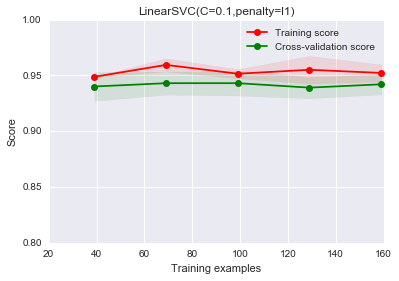

In [34]:
plot_learning_curve(LinearSVC(C=0.1,penalty='l1',dual=False)
                    ,"LinearSVC(C=0.1,penalty=l1)",X,y,ylim=(0.8,1.0),train_sizes=np.linspace(.05,0.2,5))

In [35]:
est=LinearSVC(C=0.1,penalty='l1',dual=False)

In [36]:
est.fit(X[:150],y[:150])

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [37]:
"Coefficients learned:%s" %est.coef_

'Coefficients learned:[[ 0.          0.          0.          0.          0.          0.01857986\n   0.          0.          0.          0.00413523  0.          1.05241591\n   0.01971264  0.          0.          0.          0.         -0.05665467\n   0.14106617  0.        ]]'

In [39]:
"Non-zero coefficients:%s" %np.nonzero(est.coef_)[1]

'Non-zero coefficients:[ 5  9 11 12 17 18]'

In [42]:
from sklearn.datasets import make_circles

In [43]:
X,y=make_circles(n_samples=1000,random_state=2)

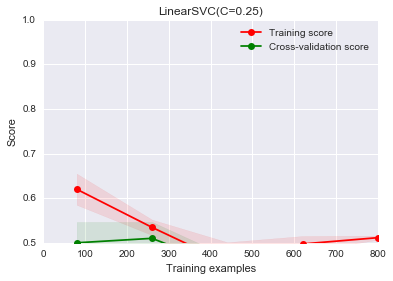

In [44]:
plot_learning_curve(LinearSVC(C=0.5),"LinearSVC(C=0.25)",X,y,ylim=(0.5,1.0),train_sizes=np.linspace(.1,1.0,5))

In [46]:
df=DataFrame(np.hstack((X,y[:,None])),columns=range(2)+["class"])

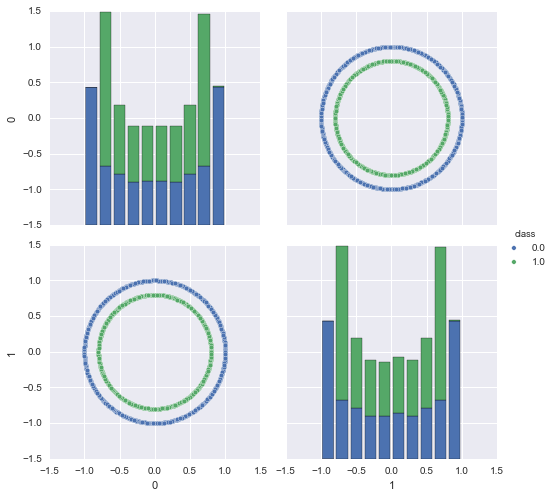

In [47]:
sns.pairplot(df,vars=[0,1],hue='class',size=3.5)

In [48]:
X_extra=np.hstack((X,X[:,[0]]**2+X[:,[1]]**2))

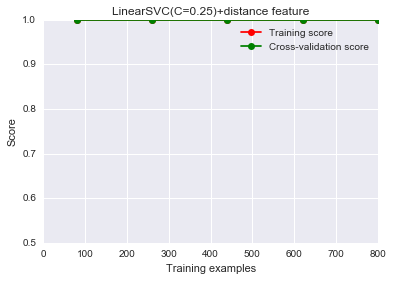

In [50]:
plot_learning_curve(LinearSVC(C=0.25),"LinearSVC(C=0.25)+distance feature",X_extra,y,ylim=(0.5,1.0),train_sizes=np.linspace(.1,1.0,5))

In [51]:
from sklearn.svm import SVC

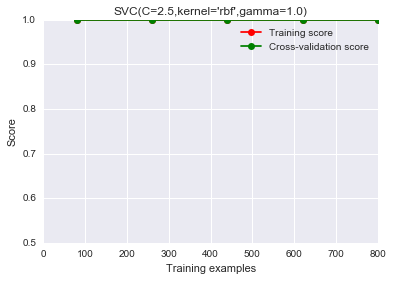

In [52]:
plot_learning_curve(SVC(C=2.5,kernel='rbf',gamma=1.0),"SVC(C=2.5,kernel='rbf',gamma=1.0)"
                    ,X,y,ylim=(0.5,1.0),train_sizes=np.linspace(.1,1.0,5))

In [53]:
X,y=make_classification(200000,n_features=200,n_informative=25
                        ,n_redundant=0,n_classes=10,class_sep=2,random_state=0)

In [54]:
from sklearn.linear_model import SGDClassifier

In [55]:
est=SGDClassifier(penalty='l2',alpha=0.001)

In [56]:
progressive_validation_score=[]

In [57]:
train_score=[]

In [59]:
for datapoint in range(0,199000,1000):
    X_batch=X[datapoint:datapoint+1000]
    y_batch=y[datapoint:datapoint+1000]
    if datapoint>0:
        progressive_validation_score.append(est.score(X_batch,y_batch))
    est.partial_fit(X_batch,y_batch,classes=range(10))
    if datapoint>0:
        train_score.append(est.score(X_batch,y_batch))

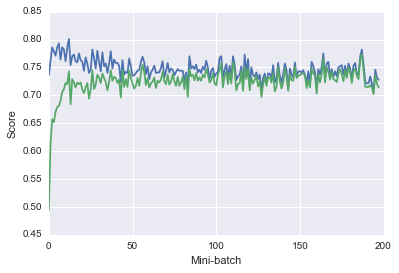

In [62]:
plt.plot(train_score,label="train score")
plt.plot(progressive_validation_score,label="progressive validation score")
plt.xlabel('Mini-batch')
plt.ylabel('Score')

In [63]:
from sklearn.datasets import load_digits

In [64]:
digits=load_digits(n_class=6)

In [65]:
X=digits.data

In [66]:
y=digits.target

In [67]:
n_samples,n_features=X.shape

In [68]:
"Dataset consist of %d samples with %d features each"%(n_samples,n_features)

'Dataset consist of 1083 samples with 64 features each'

In [69]:
n_img_per_row=20

In [70]:
img=np.zeros((10*n_img_per_row,10*n_img_per_row))

In [73]:
for i in range(n_img_per_row):
    ix=10*i+1
    for j in range(n_img_per_row):
        iy=10*j+1
        img[ix:ix+8,iy:iy+8]=X[i*n_img_per_row+j].reshape((8,8))

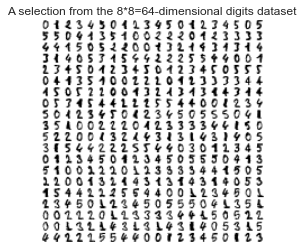

In [77]:
plt.imshow(img,cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 8*8=64-dimensional digits dataset')

In [78]:
from matplotlib import offsetbox

In [101]:
def plot_embedding(X,title=None):
    x_min,x_max=np.min(X,0),np.max(X,0)
    X=(X-x_min)/(x_max-x_min)#标准化
    plt.figure(figsize=(10,10))
    ax=plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i,0],X[i,1],str(digits.target[i]),color=plt.cm.Set1(y[i]/10.),fontdict={'weight':'bold','size':12})
    if hasattr(offsetbox,'AnnotationBbox'):
        shown_images=np.array([[1.,1.]])
        for i in range(digits.data.shape[0]):
            dist=np.sum((X[i]-shown_images)**2,1)
            if np.min(dist)<4e-3:
                continue
            shown_images=np.r_[shown_images,[X[i]]]
            imagebox=offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i],cmap=plt.cm.gray_r),X[i])
            ax.add_artist(imagebox)
    plt.xticks([]),plt.yticks([])
    if title is not None:
        plt.title(title)
    

In [102]:
from sklearn import(manifold,decomposition,random_projection)

In [103]:
rp=random_projection.SparseRandomProjection(n_components=2,random_state=42)

In [104]:
stime=time.time()

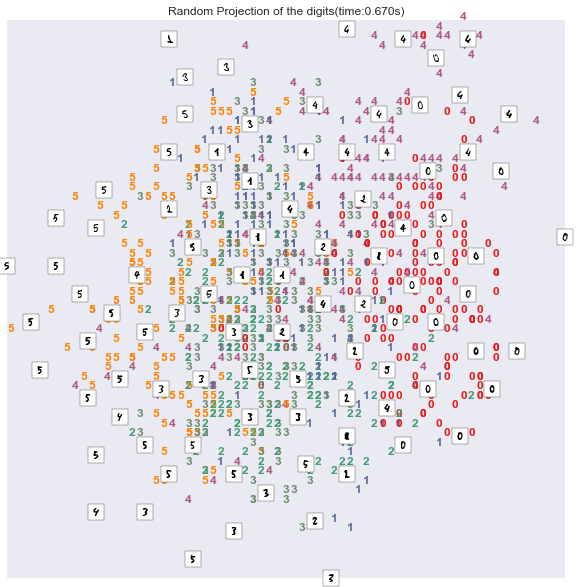

In [105]:
X_projected=rp.fit_transform(X)
plot_embedding(X_projected,"Random Projection of the digits(time:%.3fs)"%(time.time()-stime))

In [107]:
X_pca=decomposition.TruncatedSVD(n_components=2).fit_transform(X)

In [109]:
stime=time.time()#当前时间

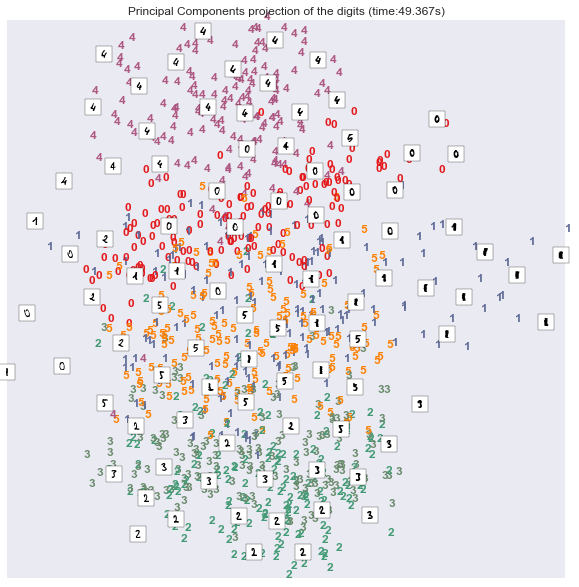

In [110]:
plot_embedding(X_pca,'Principal Components projection of the digits (time:%.3fs)'%(time.time()-stime))

In [112]:
tsne=manifold.TSNE(n_components=2,init='pca',random_state=0)

In [113]:
stime=time.time()

In [125]:
xmin,xmax=-4,4

In [126]:
xx=np.linspace(xmin,xmax,100)

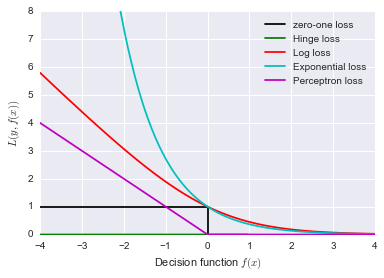

In [136]:
plt.plot([xmin,0,0,xmax],[1,1,0,0],'k-',label='zero-one loss')
plt.plot(xx,np.where(xx>1,1-xx,0),'g-',label='Hinge loss')
plt.plot(xx,np.log2(1+np.exp(-xx)),'r-',label='Log loss')
plt.plot(xx,np.exp(-xx),'c-',label='Exponential loss')
plt.plot(xx,-np.minimum(xx,0),'m-',label='Perceptron loss')
plt.ylim((0,8))
plt.legend(loc='upper right')
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel('$L(y,f(x))$')